# Overfitting Demonstration and Early Stopping

In [ ]:
import tensorflow as tf
from tensorflow.keras import layers, models
from tensorflow.keras.callbacks import EarlyStopping
import matplotlib.pyplot as plt


# 1. Load and preprocess MNIST dataset
(x_train, y_train), (x_test, y_test) = tf.keras.datasets.mnist.load_data()

# Normalize pixel values
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

# Flatten 28x28 images into vectors of size 784
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
x_train_small=x_train[:2000]
y_train_small=y_train[:2000]


def build_mlp():
  model=models.Sequential([layers.Input(shape=(784,)),
      layers.Dense(512,activation='relu'),
      layers.Dense(256,activation='relu'),
      layers.Dense(10,activation='softmax')

  ])
  model.compile(optimizer='adam',loss='sparse_categorical_crossentropy',metrics=['accuracy'])
  return model

In [ ]:
# 3 train without early stoppy
print(" \n Training without early stopping \n")
model_no_es=build_mlp()
history_no_es=model_no_es.fit(x_train_small,y_train_small,
                              epochs=50,
                              batch_size=64,
                              validation_split=0.2,
                              verbose=1)

 
 Training without early stopping 

Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 20ms/step - accuracy: 0.5484 - loss: 1.5555 - val_accuracy: 0.8725 - val_loss: 0.3851
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8886 - loss: 0.3787 - val_accuracy: 0.9275 - val_loss: 0.3054
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9356 - loss: 0.2488 - val_accuracy: 0.9275 - val_loss: 0.2539
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9592 - loss: 0.1569 - val_accuracy: 0.9325 - val_loss: 0.2289
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 14ms/step - accuracy: 0.9721 - loss: 0.1097 - val_accuracy: 0.9500 - val_loss: 0.1967
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9892 - loss: 0.0610 - val_accuracy: 0.9300 - val_loss: 0.2189
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9923 - loss: 0.0382 - val_accuracy: 0.9325 - val_loss: 0.2208
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9995 - lo

In [ ]:

#4.train with earlystopping
print("\nTraining with early stopping")
model_es=build_mlp()
early_stopping=EarlyStopping(monitor='val_loss',patience=3,restore_best_weights=True)

history_es=model_es.fit(x_train_small,y_train_small,epochs=50,validation_split=0.2, batch_size=64,verbose=1,callbacks=[early_stopping])


Training with early stopping
Epoch 1/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 2s 21ms/step - accuracy: 0.5370 - loss: 1.5538 - val_accuracy: 0.8775 - val_loss: 0.3950
Epoch 2/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.8787 - loss: 0.3505 - val_accuracy: 0.9075 - val_loss: 0.3182
Epoch 3/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 13ms/step - accuracy: 0.9388 - loss: 0.2217 - val_accuracy: 0.9375 - val_loss: 0.2329
Epoch 4/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9643 - loss: 0.1402 - val_accuracy: 0.9200 - val_loss: 0.2530
Epoch 5/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9719 - loss: 0.1041 - val_accuracy: 0.9125 - val_loss: 0.2938
Epoch 6/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step - accuracy: 0.9890 - loss: 0.0574 - val_accuracy: 0.9400 - val_loss: 0.2148
Epoch 7/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 1s 14ms/step - accuracy: 0.9941 - loss: 0.0385 - val_accuracy: 0.9350 - val_loss: 0.2202
Epoch 8/50
25/25 ━━━━━━━━━━━━━━━━━━━━ 0s 13ms/step - accuracy: 0.9984 - loss: 0.0

In [ ]:
#5 evaluate both models
loss_mo_es,acc_no_es=model_no_es.evaluate(x_test,y_test,verbose=1)
loss_es,acc_es=model_es.evaluate(x_test,y_test,verbose=1)

print(f"Test Accuracy without early stopping - Accuracy:{acc_no_es:.4f}")
print(f"Test Accuracy with early stopping - Accuracy:{acc_es:.4f}")

print(f"Test Loss without early stopping - Loss:{loss_mo_es:.4f}")
print(f"Test Loss with early stopping - Loss:{loss_es:.4f}")

313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8999 - loss: 0.4725
313/313 ━━━━━━━━━━━━━━━━━━━━ 1s 3ms/step - accuracy: 0.8936 - loss: 0.3977
Test Accuracy without early stopping - Accuracy:0.9179
Test Accuracy with early stopping - Accuracy:0.9091
Test Loss without early stopping - Loss:0.3985
Test Loss with early stopping - Loss:0.3394


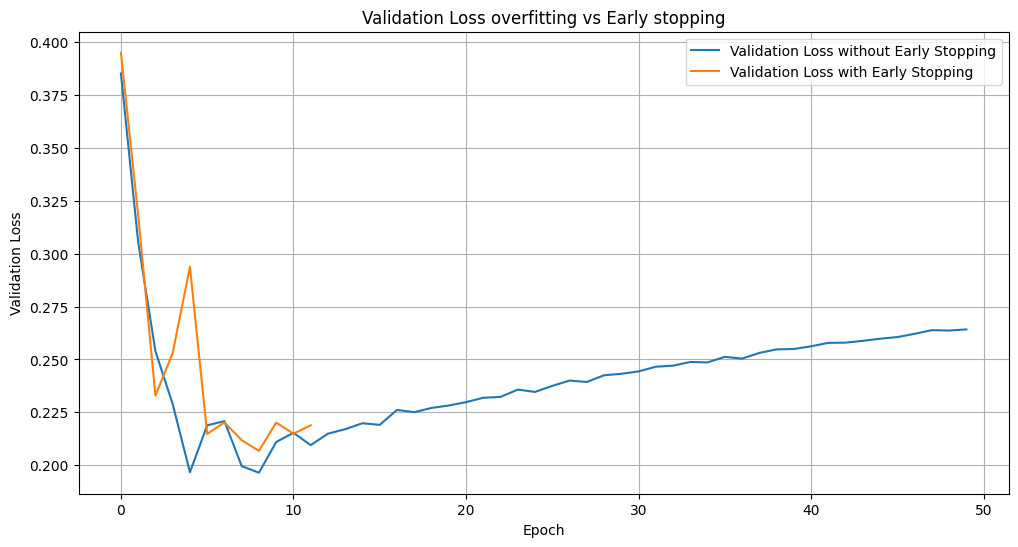

In [ ]:
#6 Plot Validation Loss Curves
plt.figure(figsize=(12,6))
plt.plot(history_no_es.history['val_loss'],label='Validation Loss without Early Stopping')
plt.plot(history_es.history['val_loss'],label='Validation Loss with Early Stopping')
plt.xlabel('Epoch')
plt.ylabel('Validation Loss')
plt.title('Validation Loss overfitting vs Early stopping')
plt.legend()
plt.grid(True)
plt.show()